Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'), index_col='item_id')
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'), index_col='item_category_id')
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'), index_col='shop_id')

transactions.date = pd.to_datetime(transactions.date, format='%d.%m.%Y')

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
transactions.shape
transactions.head()

items.shape
items.head()

item_categories.shape
item_categories.head()

shops.shape
shops.head()

(2935849, 6)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


(22170, 2)

,item_name,item_category_id
item_id,,
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40
1,!ABBYY FineReader 12 Professional Edition Full...,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,40
4,***КОРОБКА (СТЕКЛО) D,40


(84, 1)

,item_category_name
item_category_id,
0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2
2,Аксессуары - PS3
3,Аксессуары - PS4
4,Аксессуары - PSP


(60, 1)

,shop_name
shop_id,
0,"!Якутск Орджоникидзе, 56 фран"
1,"!Якутск ТЦ ""Центральный"" фран"
2,"Адыгея ТЦ ""Мега"""
3,"Балашиха ТРК ""Октябрь-Киномир"""
4,"Волжский ТЦ ""Волга Молл"""


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [5]:
transactions['revenue'] = transactions.item_price * transactions.item_cnt_day

In [6]:
september2014 = transactions[(transactions.date.dt.year == 2014) & (transactions.date.dt.month == 9)]
september2014.shape
september2014.head()

(73157, 7)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
1953691,2014-09-24,20,5,1039,899.0,1.0,899.0
1953692,2014-09-27,20,5,1015,449.0,1.0,449.0
1953693,2014-09-07,20,5,1329,399.0,1.0,399.0
1953694,2014-09-27,20,5,984,399.0,1.0,399.0
1953695,2014-09-08,20,5,984,399.0,1.0,399.0


In [7]:
# YOUR CODE GOES HERE
max_revenue = september2014.groupby(by=september2014.shop_id).revenue.sum().max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [8]:
mask = (transactions.date.dt.year == 2014) & (transactions.date.dt.month.between(6, 8))
summer2014 = transactions.loc[mask].join(items, on='item_id')

summer2014.shape
summer2014.head()

(247782, 9)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_name,item_category_id
1705909,2014-06-15,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1705910,2014-06-10,17,26,9507,149.00,1.0,149.00,В ПОИСКАХ НЕМО (регион),40
1705911,2014-06-13,17,26,9509,246.32,1.0,246.32,В ПОСТЕЛИ С ВРАГОМ (BD),37
1705912,2014-06-03,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1705913,2014-06-08,17,26,9532,399.00,1.0,399.00,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [9]:
# YOUR CODE GOES HERE
category_id_with_max_revenue = summer2014.revenue.groupby(by=summer2014.item_category_id).sum().idxmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [10]:
counts = transactions.groupby(by='item_id').item_price.unique().map(lambda x: x.shape[0])

In [11]:
# YOUR CODE GOES HERE
num_items_constant_price = counts[counts == 1].count()
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [12]:
shop_id = 25

mask = (transactions.shop_id == shop_id) & (transactions.date.dt.year == 2014) & (transactions.date.dt.month == 12)
december2014 = transactions.loc[mask]

december2014.shape
december2014.head()

(8684, 7)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
2295837,2014-12-14,23,25,21752,399.0,1.0,399.0
2295838,2014-12-13,23,25,21752,399.0,3.0,1197.0
2295839,2014-12-26,23,25,21733,149.0,1.0,149.0
2295840,2014-12-31,23,25,21732,149.0,1.0,149.0
2295841,2014-12-30,23,25,21726,149.0,1.0,149.0


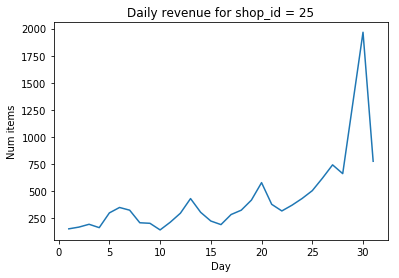

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [13]:
shop_id = 25

sums = december2014.item_cnt_day.groupby(by=december2014.date.dt.day).sum()
total_num_items_sold = sums.values
days = sums.index.values

# Plot it
_ = plt.plot(days, total_num_items_sold)
_ = plt.ylabel('Num items')
_ = plt.xlabel('Day')
_ = plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [14]:
STUDENT_EMAIL = ""
STUDENT_TOKEN = ""
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [15]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)